In [1]:
import numpy as np
from numpy.linalg import eig, det
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('pastel')
import sympy as sp
from scipy.integrate import odeint
from scipy.optimize import fsolve

### Define Differential Equations

In [2]:
def trp_eqs(x, u_R):
    """
    Define parameter and ODE's describing the trp operon
    x = x[0] : mRNA conc
    y = x[1] : enzyme conc
    z = x[2] : trp conc
    """
    # Constants
    a_1 = 0.9
    a_2 = 0.02
    a_3 = 0
    a_4 = 0.024
    a_5 = 430
    a_6 = -7.5
    k = 0.005
    k_i = 100
    T = 0.0156
    mu_m = 0.0312
    
    k_a = 5.5
    k_r = 25
    r_m = 75
    
    r = r_m * x[2] / (x[2] + k_r)
    mu = u_R * mu_m
    u = T*mu
    
    # ODE's
    dx0_dt = (1 + x[2]) / (1 + (1 + r) * x[2]) * k_a / (k_a + x[2]) - (u + a_1) * x[0]
    dx1_dt = x[0] - (u + a_2) * x[1]
    dx2_dt = x[1] * (k_i**2) / ((k_i**2) + (x[2]**2)) - \
    (u + a_3) * x[2] - (a_4 * x[2]) / (1 + x[2]) * x[2] / (x[2] + k_r) - \
    a_5 * (1 + a_6 * u) * u * x[2] / (x[2] + k)
    
    dx_dt = [dx0_dt, dx1_dt, dx2_dt]
    return dx_dt

In [3]:
def trp_dynamics(x, t, u_R):
    """
    Helper function for simulating trp operon dynamics over time
    """
    dx_dt = trp_eqs(x, u_R)
    return dx_dt

### Solve for the Fixed Points
By solving for all DE's = 0 numerically

In [105]:
def u_R_to_ss_concs(u_R_vec):
    x_stars = []
    y_stars = []
    z_stars = []
    for u_R in u_R_vec:
        x_star, y_star, z_star = fsolve(trp_eqs, (0, 0, 0), args=(u_R,))
        x_stars.append(x_star)
        y_stars.append(y_star)
        z_stars.append(z_star)
    x_stars = np.array(x_stars)
    y_stars = np.array(y_stars)
    z_stars = np.array(z_stars)
    return x_stars, y_stars, z_stars

In [110]:
u_R_vals = np.linspace(0, 1, 1000)

In [111]:
x_stars, y_stars, z_stars = u_R_to_ss_concs(u_R_vals)

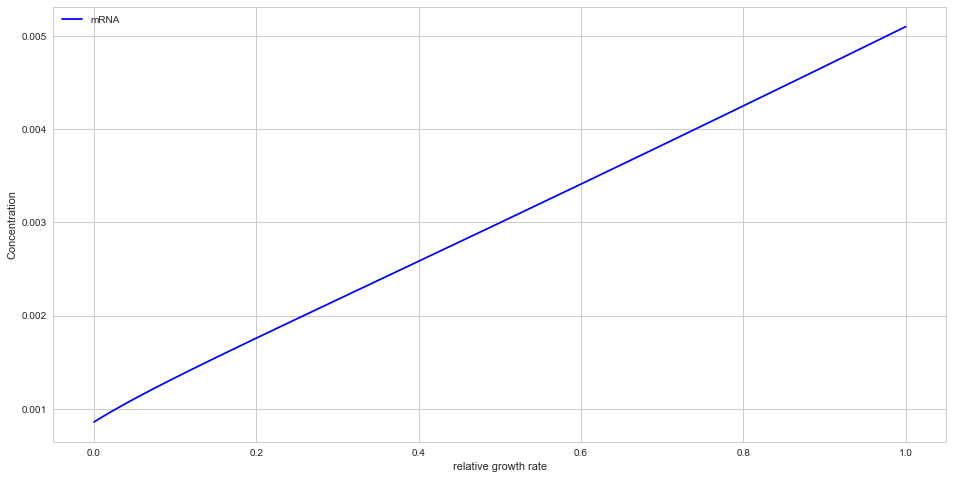

In [114]:
plt.figure(figsize=(16, 8))
plt.plot(u_R_vals, x_stars, 'b', label='mRNA')
# plt.plot(u_R_vals, y_stars, 'r', label='Enzyme')
# plt.plot(u_R_vals, z_stars, 'g', label='Trp')
plt.legend(loc='best')
plt.xlabel('relative growth rate')
plt.ylabel('Concentration')

In [77]:
x_star, y_star, z_star =  fsolve(trp_eqs, (1, 1, 1), args=(u_R,))
print(x_star, y_star, z_star)

0.00133359850548 0.0665180469547 75.458820578


In [78]:
x0 = [x_star, y_star, z_star]
t = np.linspace(0, 500, 1000)

In [79]:
sol = odeint(trp_dynamics, x0, t, args=(u_R,))
sol

array([[  1.33359851e-03,   6.65180470e-02,   7.54588206e+01],
       [  1.33359851e-03,   6.65180470e-02,   7.54588206e+01],
       [  1.33359851e-03,   6.65180470e-02,   7.54588206e+01],
       ..., 
       [  1.33359851e-03,   6.65180470e-02,   7.54588206e+01],
       [  1.33359851e-03,   6.65180470e-02,   7.54588206e+01],
       [  1.33359851e-03,   6.65180470e-02,   7.54588206e+01]])

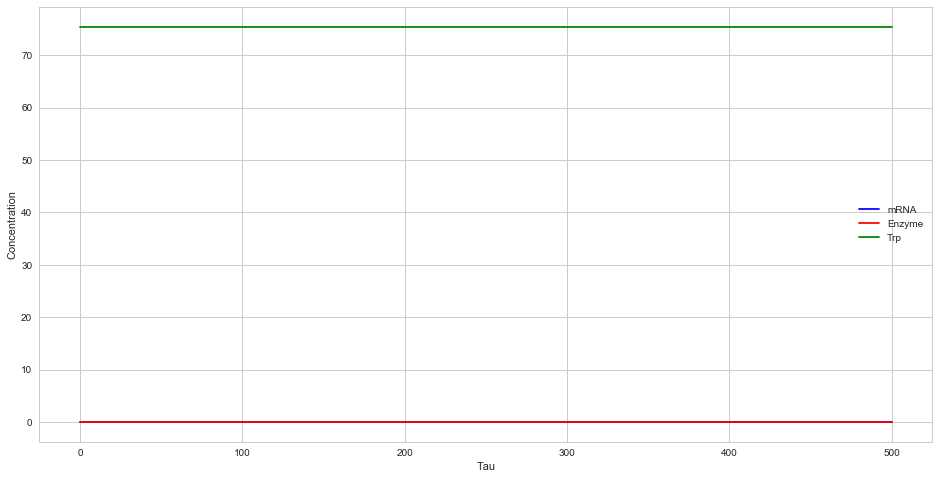

In [80]:
plt.figure(figsize=(16, 8))
plt.plot(t, sol[:,0], 'b', label='mRNA')
plt.plot(t, sol[:,1], 'r', label='Enzyme')
plt.plot(t, sol[:,2], 'g', label='Trp')
plt.legend(loc='best')
plt.xlabel('Tau')
plt.ylabel('Concentration')

### Numerical Integration

In [94]:
x0 = [1, 50, 0]
t = np.linspace(0, 700, 5000)

In [95]:
sol = odeint(trp_dynamics, x0, t, args=(0.1,))
sol

array([[  1.00000000e+00,   5.00000000e+01,   0.00000000e+00],
       [  9.03290909e-01,   4.99936894e+01,   6.98650167e+00],
       [  7.98592916e-01,   4.99723937e+01,   1.39035351e+01],
       ..., 
       [  2.34986704e-04,   1.16614199e-02,   3.60961026e+02],
       [  2.34992459e-04,   1.16615868e-02,   3.60952619e+02],
       [  2.34998215e-04,   1.16617542e-02,   3.60944211e+02]])

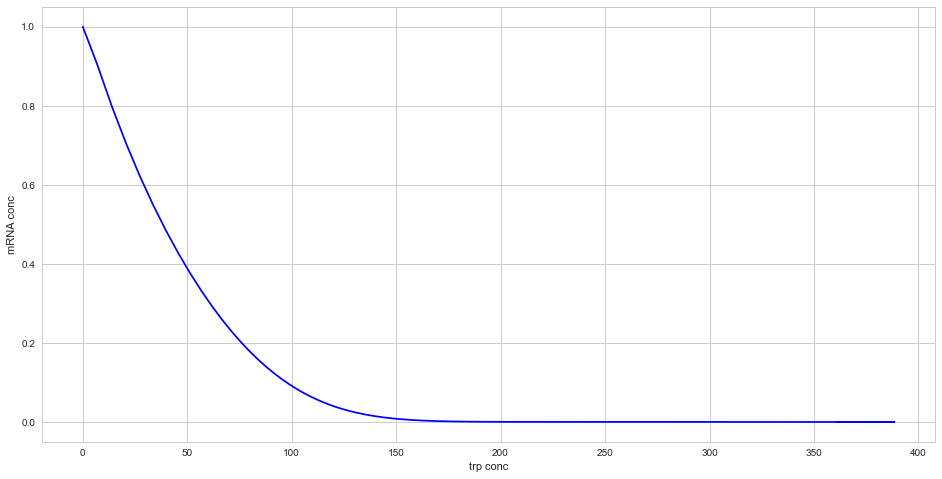

In [96]:
plt.figure(figsize=(16,8))
plt.plot(sol[:,2], sol[:,0], 'b')
plt.xlabel('trp conc')
plt.ylabel('mRNA conc')

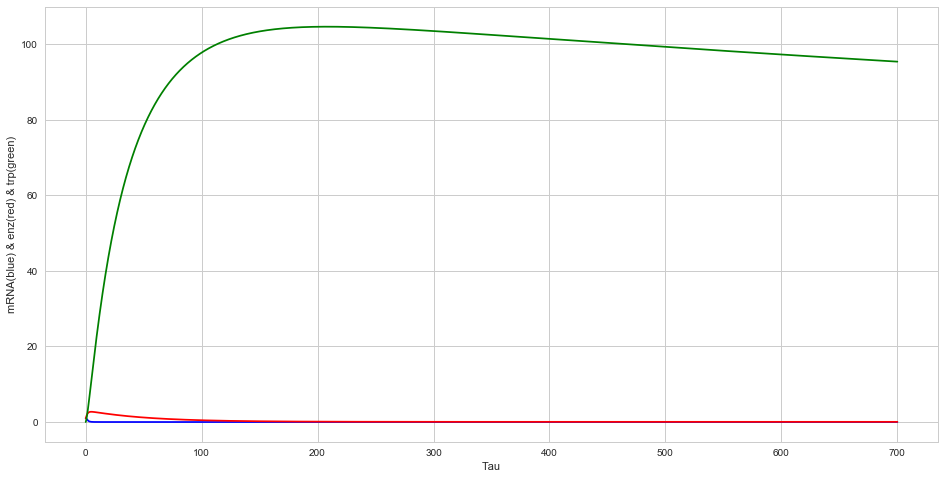

In [87]:
plt.figure(figsize=(16, 8))
plt.plot(t, sol[:,0], 'b')
plt.plot(t, sol[:,1], 'r')
plt.plot(t, sol[:,2], 'g')
plt.xlabel('Tau')
plt.ylabel('mRNA(blue) & enz(red) & trp(green)')

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(sol[:,0], sol[:,1], 'b')
plt.xlabel('mRNA conc')
plt.ylabel('enz conc')

### Jacobian Matrix

In [ ]:
(x, y) = sp.symbols('x, y', real=True)

In [ ]:
dx, dy = trp_eqs((x, y))

In [ ]:
A = sp.Matrix([dx, dy])

In [ ]:
J = A.jacobian([x, y])

In [ ]:
J

In [ ]:
J_atFP = J.subs([(x, x_star), (y, y_star)])
J_atFP

### Evaluating Stability

In [ ]:
trace = J_atFP.trace()
trace

In [ ]:
determinant = J_atFP.det()
determinant

In [ ]:
eigens = J_atFP.eigenvects()

In [ ]:
eigens # ==> eigenvalues, multiplicity, eigenvector